In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout, Input
from keras.optimizers import Adam
import cv2
from tensorflow.keras.applications import DenseNet121
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator,img_to_array
from sklearn.model_selection import KFold
from keras.callbacks import ModelCheckpoint, EarlyStopping
import time
from keras.models import load_model
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model

In [ ]:
data_set_path = '/content/drive/My Drive/dataset/CK+_With_person_subfolder'
valid_path = '/content/drive/My Drive/dataset/valid'
train_path = '/content/drive/My Drive/dataset/train'
test_path = '/content/drive/My Drive/dataset/test'

In [ ]:
def cnn_model(class_sz):
    desnet= DenseNet121(include_top=True, weights='imagenet')

    out = Dense(class_sz, activation='softmax', name='predictions')(desnet.layers[-2].output)
    desnet_model = Model(desnet.input, out)

    for layer in desnet_model.layers:
      layer.trainable = True

    model = Sequential()
    model.add(desnet_model)
    
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
def train_preprocess_img(img):
    data=[]
    datagen = ImageDataGenerator(
        rotation_range=1,
        horizontal_flip=True,
        fill_mode='nearest')
    x = img_to_array(img) 
    x = x.reshape((1,) + x.shape)
    aug = datagen.flow(x)
    aug_img = [next(aug)[0] for i in range(4)]  
    for img in  aug_img:
      img = img*255
      data.append(img)  
    return(data)

def test_preprocess_img(img):
    data=[]
    img=img*255
    data.append(img)
    return(data)

In [ ]:
train_batch_size=32
valid_batch_size=32
test_batch_size=1
sz=(224,224)
img_type= 'rgb'
if img_type == 'grayscale':
    inp_shape=(sz[0],sz[1],1)
elif img_type == 'rgb':
    inp_shape=(sz[0],sz[1],3)
elif img_type == 'rgba':
    inp_shape=(sz[0],sz[1],4)
EPOCH=35
epochs_to_wait_for_improve=30

========================================   Fold 1   ==============================================
Found 2916 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
33193984/33188688 [==============================] - 0s 0us/step
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/35
91/91 [==============================] - ETA: 0s - loss: 0.1790 - accuracy: 0.9386
Epoch 00001: val_loss improved from inf to 24.84408, saving model to Best_model_for_epoch_1.h5
91/91 [==============================] - 20s 222ms/step - loss: 0.1790 - accuracy: 0.9386 - val_loss: 24.8441 - val_accuracy: 0.2708
Epoch 2/35
91/91 [==============================] - ETA: 0s - loss: 0.0505 - accuracy: 0.9847
Epoch 00002: val_loss improved from 24.84408 to 9.10698, saving model to Best_model_for_epoch_1.h5
91/91 [==============================] - 18s 198ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 9.1070 - val_accuracy

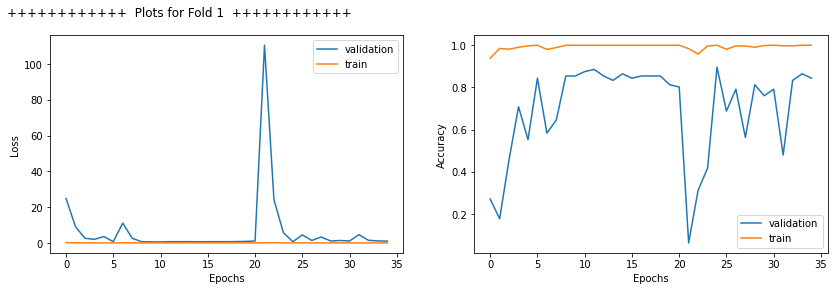

Instructions for updating:
Please use Model.evaluate, which supports generators.
99/99 [==============================] - 2s 16ms/step - loss: 0.1086 - accuracy: 0.9899
Instructions for updating:
Please use Model.predict, which supports generators.
99/99 [==============================] - 1s 14ms/step
Confusion Matrix
[[15  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  1 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        21
           4       0.90      1.00      0.95         9
           5       1.00      0.96      0.98        27

    accuracy                           0.99        99
   macro avg       0.98      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99

==========

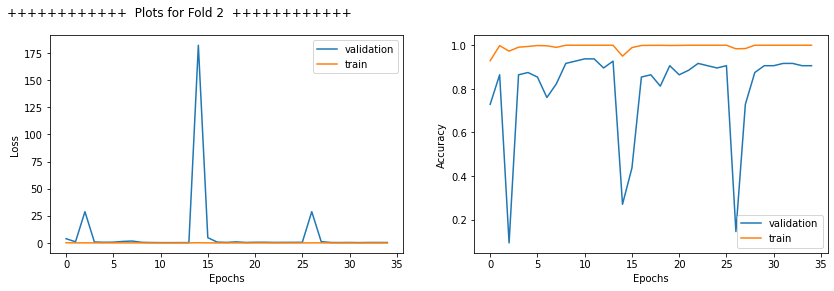

99/99 [==============================] - 1s 14ms/step
Confusion Matrix
[[10  2  0  0  3  0]
 [ 0 18  0  0  0  0]
 [ 0  0  6  0  3  0]
 [ 0  0  0 21  0  0]
 [ 3  0  0  0  5  1]
 [ 0  0  0  3  1 23]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.90      1.00      0.95        18
           2       1.00      0.67      0.80         9
           3       0.88      1.00      0.93        21
           4       0.42      0.56      0.48         9
           5       0.96      0.85      0.90        27

    accuracy                           0.84        99
   macro avg       0.82      0.79      0.80        99
weighted avg       0.86      0.84      0.84        99

========================================   Fold 3   ==============================================
Found 2928 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Epoch 1/35
91/91 [====================

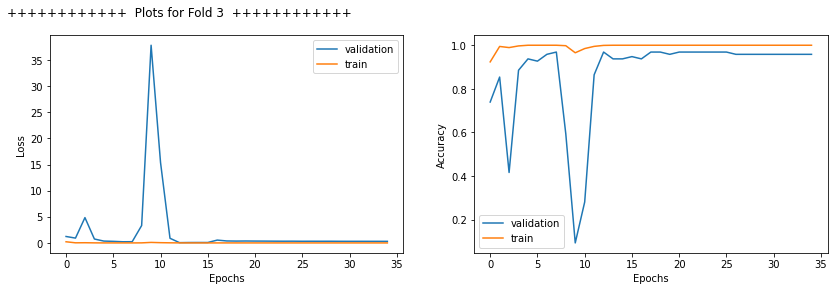

99/99 [==============================] - 1s 14ms/step
Confusion Matrix
[[12  3  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.86      1.00      0.92        18
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        27

    accuracy                           0.97        99
   macro avg       0.98      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99

========================================   Fold 4   ==============================================
Found 2940 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Epoch 1/35
91/91 [====================

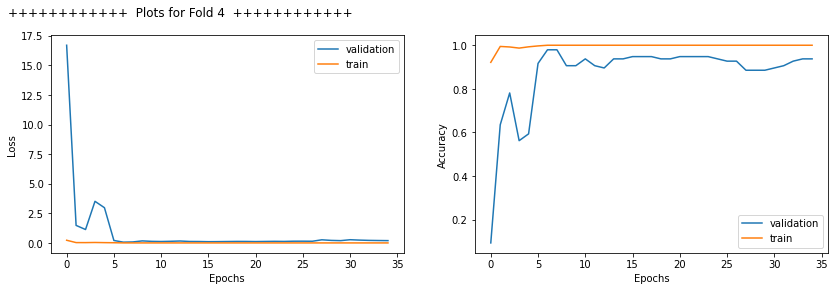

96/96 [==============================] - 1s 14ms/step
Confusion Matrix
[[15  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 21  0  0]
 [ 4  0  0  0  5  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        21
           4       1.00      0.56      0.71         9
           5       1.00      1.00      1.00        24

    accuracy                           0.96        96
   macro avg       0.96      0.93      0.93        96
weighted avg       0.97      0.96      0.95        96

========================================   Fold 5   ==============================================
Found 2964 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Epoch 1/35
92/92 [====================

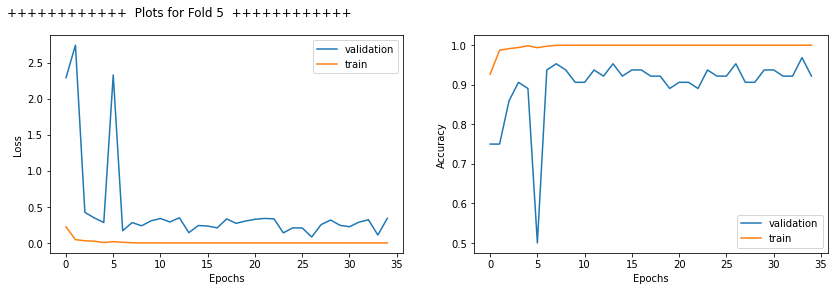

96/96 [==============================] - 1s 13ms/step
Confusion Matrix
[[15  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  6  3  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      0.67      0.80         9
           3       0.88      1.00      0.93        21
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        24

    accuracy                           0.97        96
   macro avg       0.98      0.94      0.96        96
weighted avg       0.97      0.97      0.97        96

========================================   Fold 6   ==============================================
Found 2988 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/35
93/93 [====================

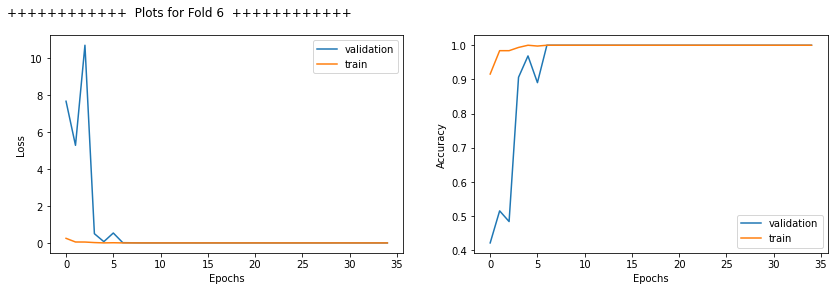

90/90 [==============================] - 1s 13ms/step
Confusion Matrix
[[12  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        24

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

========================================   Fold 7   ==============================================
Found 2988 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/35
93/93 [====================

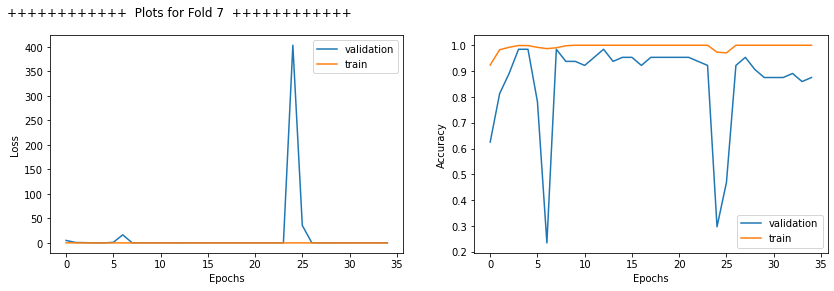

90/90 [==============================] - 1s 14ms/step
Confusion Matrix
[[12  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  1]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        21
           4       1.00      0.89      0.94         9
           5       0.96      1.00      0.98        24

    accuracy                           0.99        90
   macro avg       0.99      0.98      0.99        90
weighted avg       0.99      0.99      0.99        90

========================================   Fold 8   ==============================================
Found 3000 images belonging to 6 classes.
Found 87 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/35
93/93 [====================

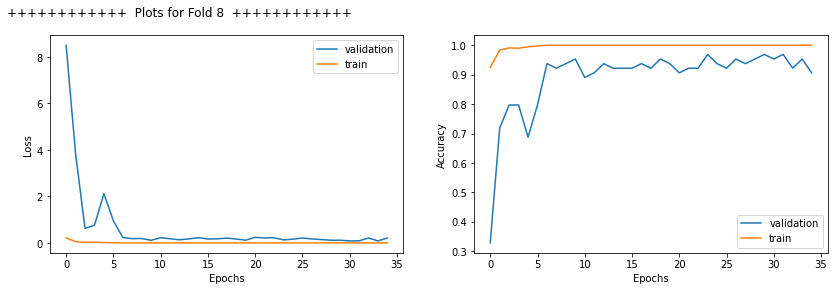

90/90 [==============================] - 1s 13ms/step
Confusion Matrix
[[12  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 21  0  0]
 [ 3  0  0  0  6  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        21
           4       1.00      0.67      0.80         9
           5       1.00      1.00      1.00        24

    accuracy                           0.97        90
   macro avg       0.97      0.94      0.95        90
weighted avg       0.97      0.97      0.97        90

========================================   Fold 9   ==============================================
Found 3036 images belonging to 6 classes.
Found 81 images belonging to 6 classes.
Found 87 images belonging to 6 classes.
Epoch 1/35
94/94 [====================

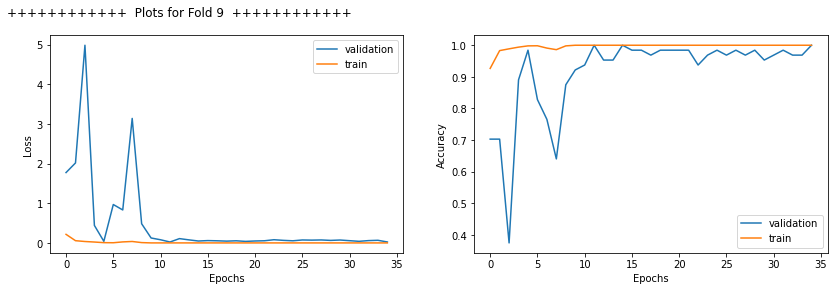

87/87 [==============================] - 1s 13ms/step
Confusion Matrix
[[ 9  3  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.86      1.00      0.92        18
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        24

    accuracy                           0.97        87
   macro avg       0.98      0.96      0.96        87
weighted avg       0.97      0.97      0.96        87

========================================   Fold 10   ==============================================
Found 2988 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Found 81 images belonging to 6 classes.
Epoch 1/35
93/93 [===================

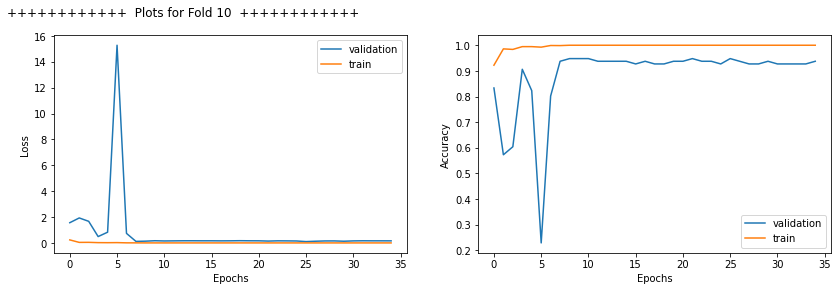

81/81 [==============================] - 1s 13ms/step
Confusion Matrix
[[11  0  1  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0  4  2  0  0]
 [ 0  0  0 18  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        15
           2       0.80      0.67      0.73         6
           3       0.90      1.00      0.95        18
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        24

    accuracy                           0.96        81
   macro avg       0.95      0.93      0.94        81
weighted avg       0.96      0.96      0.96        81



In [ ]:
import keras
import gc
cv=KFold(n_splits=10)
classes = os.listdir(data_set_path)
person_perclass = []
for c in classes:
    l=os.listdir(data_set_path+'/'+c)
    l=np.array(l)
    temp=[]
    for train_index, test_index in cv.split( X=l):
        temp.append(l[test_index])
    person_perclass.append(temp)
a=np.arange(0,10,1)
b=np.arange(0,10,1)
c=(b+1)%10
conf_foldwise = []
accuracy_foldwise = []
error_foldwise = []
actual_out = []
predict_out = []
training_time_per_epoch=[]
testing_time_per_epoch=[]
for i in range(10):
    print('===================================================================================================')
    print('========================================   Fold '+str(i+1)+'   ==============================================')
    print('===================================================================================================')
    model_name = 'Best_model_for_epoch_'+str(i+1)
    d=np.array([l for l in a if l not in [b[i], c[i]]])
    if not os.path.isdir(train_path):
        os.mkdir(train_path)
    else:
        shutil.rmtree(train_path)
        os.mkdir(train_path)

    if not os.path.isdir(test_path):
        os.mkdir(test_path)
    else:
        shutil.rmtree(test_path)
        os.mkdir(test_path)

    if not os.path.isdir(valid_path):
        os.mkdir(valid_path)
    else:
        shutil.rmtree(valid_path)
        os.mkdir(valid_path)
    for j in range(len(classes)):
        l = person_perclass[j][b[i]]
        if not os.path.isdir(test_path+'/'+classes[j]):
            os.mkdir(test_path+'/'+classes[j])
        for k in l:
            filelist = []
            [filelist.append(file) for file in os.listdir(data_set_path+'/'+classes[j]+'/'+k) if file.endswith('.png')]
            for f in filelist:
                img=plt.imread(data_set_path+'/'+classes[j]+'/'+k+'/'+f)
                data  = test_preprocess_img(img)
                for ix in range(len(data)):
                    cv2.imwrite(test_path+'/'+classes[j]+'/im_'+str(ix)+'_'+f,data[ix])
    for j in range(len(classes)):
        l = person_perclass[j][c[i]]
        if not os.path.isdir(valid_path+'/'+classes[j]):
            os.mkdir(valid_path+'/'+classes[j])
        for k in l:
            filelist = []
            [filelist.append(file) for file in os.listdir(data_set_path+'/'+classes[j]+'/'+k) if file.endswith('.png')]
            for f in filelist:
                img=plt.imread(data_set_path+'/'+classes[j]+'/'+k+'/'+f)
                data  = test_preprocess_img(img)
                for ix in range(len(data)):
                    cv2.imwrite(valid_path+'/'+classes[j]+'/im_'+str(ix)+'_'+f,data[ix])
    for j in range(len(classes)):
        for jj in range(d.shape[0]):
            l = person_perclass[j][d[jj]]
            if not os.path.isdir(train_path+'/'+classes[j]):
                os.mkdir(train_path+'/'+classes[j])
            for k in l:
                filelist = []
                [filelist.append(file) for file in os.listdir(data_set_path+'/'+classes[j]+'/'+k) if file.endswith('.png')]
                for f in filelist:
                    img=plt.imread(data_set_path+'/'+classes[j]+'/'+k+'/'+f)
                    data  = train_preprocess_img(img)
                    for ix in range(len(data)):
                        cv2.imwrite(train_path+'/'+classes[j]+'/im_'+str(ix)+'_'+f,data[ix])

    datagen = ImageDataGenerator()
    # train_generator = train_datagen.flow_from_directory(train_path, class_mode='categorical', batch_size=train_batch_size, target_size=sz,color_mode=img_type, shuffle=True)
    train_generator = datagen.flow_from_directory(train_path, class_mode='categorical', batch_size=train_batch_size, target_size=sz,color_mode=img_type, shuffle=True)
    valid_generator = datagen.flow_from_directory(valid_path, class_mode='categorical', batch_size=valid_batch_size, target_size=sz,color_mode=img_type, shuffle=True)
    test_generator = datagen.flow_from_directory(test_path, class_mode='categorical', batch_size=test_batch_size, target_size=sz, color_mode=img_type,  shuffle=False)
    
    class_size=len(np.unique(train_generator.classes))
    model = cnn_model(class_size)

    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
    
    
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=epochs_to_wait_for_improve)
    checkpoint_callback = ModelCheckpoint(model_name+'.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    start_time = time.time()
    history=model.fit_generator(generator=train_generator,
                        steps_per_epoch=STEP_SIZE_TRAIN,
                        validation_data=valid_generator,
                        validation_steps=STEP_SIZE_VALID,
                        epochs=EPOCH, callbacks=[early_stopping_callback, checkpoint_callback]
    )
    shutil.copy2(model_name+'.h5','/content/drive/My Drive/dataset/'+model_name+'.h5')
    end_time = time.time()
    training_time_per_epoch.append(end_time-start_time)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('++++++++++++  Plots for Fold '+str(i+1) +'  ++++++++++++')
    plt.subplots_adjust(left=0.2, bottom=None, right=2, top=None, wspace=None, hspace=None)
    ax1.plot(history.history['val_loss'])
    ax1.plot(history.history['loss'])
    ax1.legend(['validation','train'])
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.plot(history.history['val_accuracy'])
    ax2.plot(history.history['accuracy'])
    ax2.legend(['validation','train'])
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    plt.show()
    saved_model = load_model(model_name+'.h5')
    STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
    test_generator.reset()
    start_time = time.time()
    pred=model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)
    end_time = time.time()
    testing_time_per_epoch.append(end_time-start_time)
    accuracy_foldwise.append(pred[1])
    error_foldwise.append(pred[0])
    test_generator.reset()
    pred=model.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)
    pred_l = np.argmax(pred, axis=1)
    print('Confusion Matrix')
    conf = confusion_matrix(test_generator.classes, pred_l)
    print(conf)
    print(classification_report(test_generator.classes, pred_l))
    conf_foldwise.append(conf)
    actual_out.append(test_generator.classes)
    predict_out.append(pred)
    keras.backend.clear_session()
    del model
    gc.collect()